# Feature extraction

# Step1
import dependencies

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

/chalmers/users/filipgr/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Step2
load the payloads into memory

In [5]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

,payload,is_malicious,injection_type
index,,,
0,abellot*ada,0.0,LEGAL
1,1280x800,0.0,LEGAL
2,Juergen,0.0,LEGAL
3,ambitious,0.0,LEGAL
4,Shalne,0.0,LEGAL
5,joann,0.0,LEGAL
6,tonnage,0.0,LEGAL
7,Kowtow,0.0,LEGAL
8,3683134199988856,0.0,LEGAL


# Step3
feature engineering

In [59]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, normed=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

,payload,is_malicious,injection_type,example,length
index,,,,,
0,abellot*ada,0.0,LEGAL,1,11
1,1280x800,0.0,LEGAL,1,8
2,Juergen,0.0,LEGAL,1,7
3,ambitious,0.0,LEGAL,1,9
4,Shalne,0.0,LEGAL,1,6


Properties of feature: example
count    110381.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: example, dtype: float64


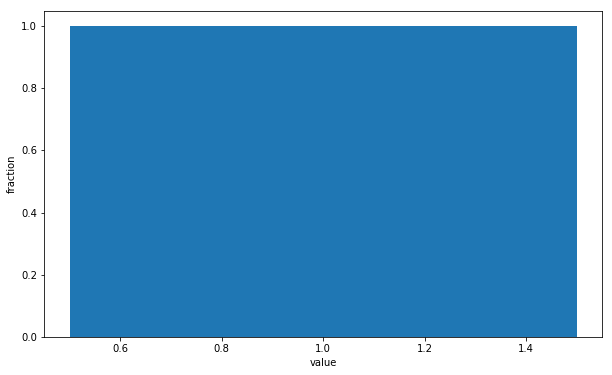

In [61]:
def create_feature_example(payloads):
    '''small description
    
    longer description
    '''
    
    payloads['example'] = [1 for row in payloads['payload']]
    return payloads

payloads = create_feature_example(payloads)
display(payloads.head())

plot_feature_distribution(payloads['example'])

,payload,is_malicious,injection_type,example,length
index,,,,,
0,abellot*ada,0.0,LEGAL,1,11
1,1280x800,0.0,LEGAL,1,8
2,Juergen,0.0,LEGAL,1,7
3,ambitious,0.0,LEGAL,1,9
4,Shalne,0.0,LEGAL,1,6


Properties of feature: length
count    110381.000000
mean         16.647168
std          33.768929
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        3024.000000
Name: length, dtype: float64


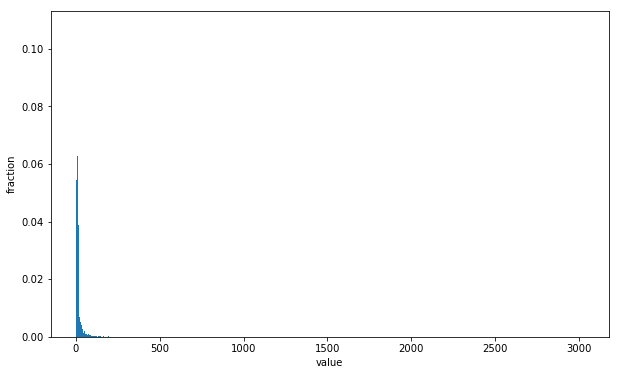

In [60]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head())


plot_feature_distribution(payloads['length'])
